In [1]:
import jieba
import jieba.analyse
import re
import pandas as pd
import matplotlib.pyplot as plt
 

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\david\AppData\Local\Temp\jieba.cache
Loading model cost 0.630 seconds.
Prefix dict has been built successfully.


權重排名(前100)
   word    TF-IDF
0    什麼  0.194645
1    八卦  0.194205
2    台灣  0.120814
3    怎麼  0.111867
4    肥宅  0.073366
..  ...       ...
95   不過  0.007350
96   一直  0.007303
97   ..  0.007249
98  ptt  0.007110
99   最強  0.006979

[100 rows x 2 columns]
權重圖(fig1):


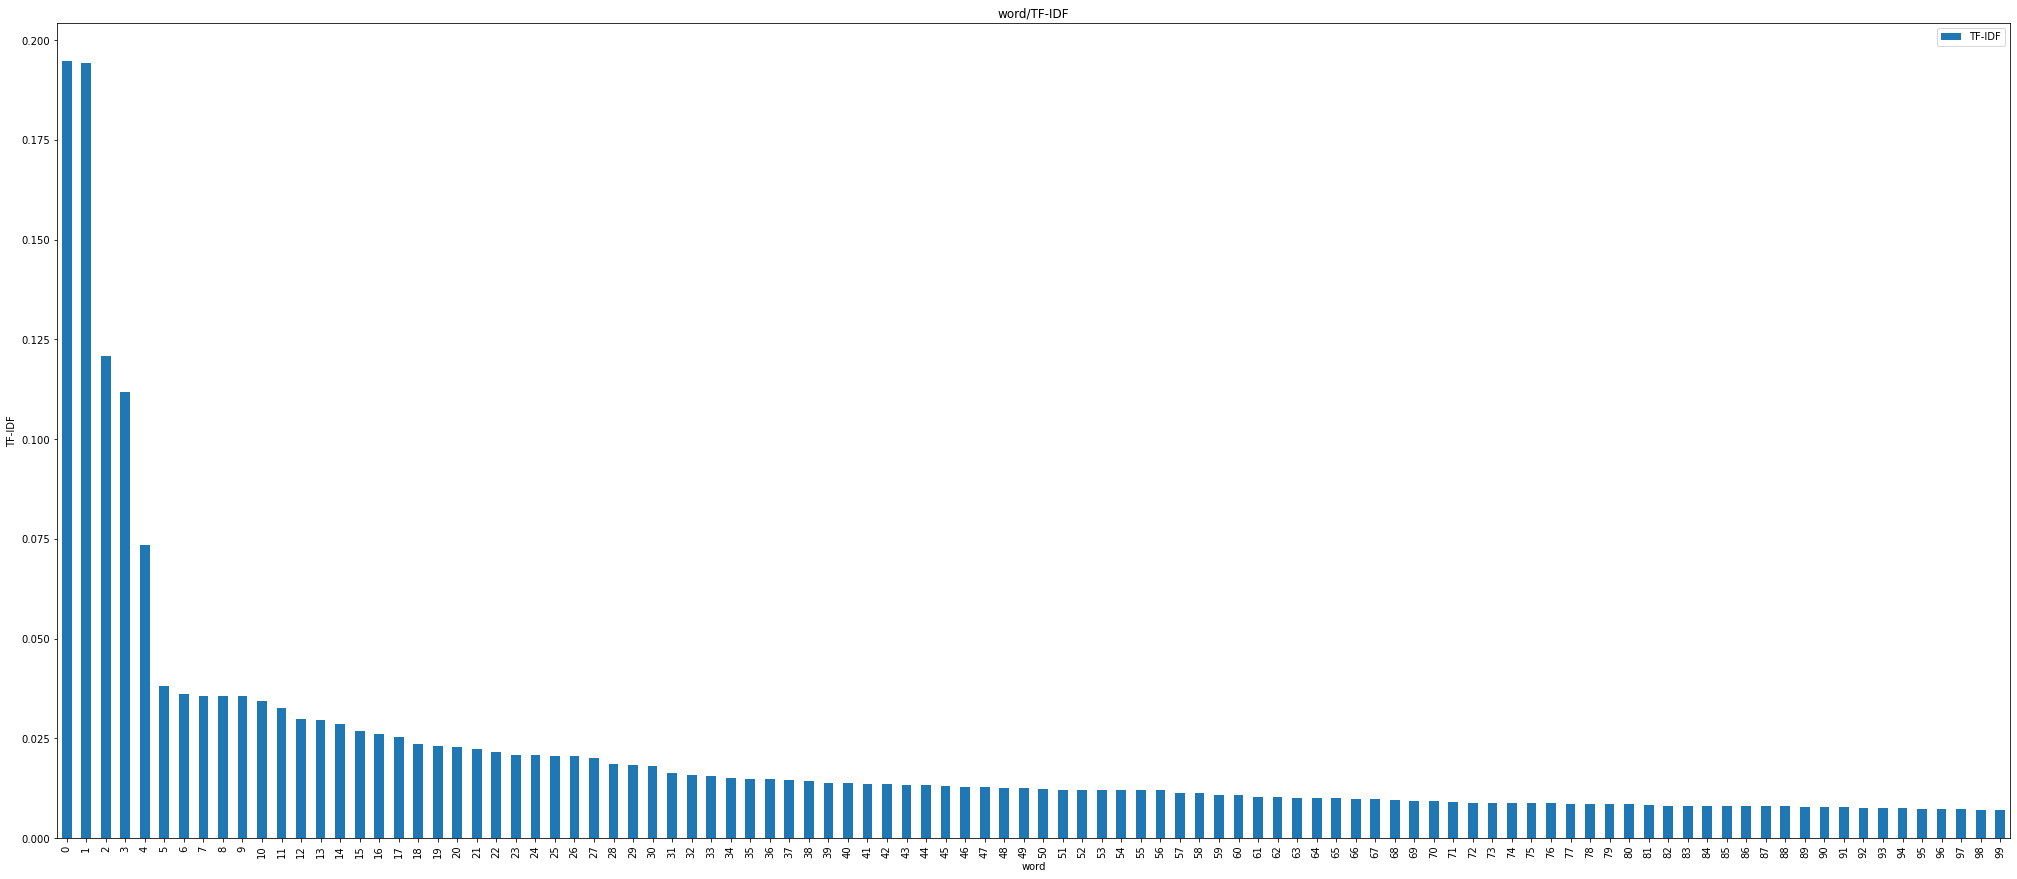

FileNotFoundError: [Errno 2] No such file or directory: 'hw-1dataset.txt'

In [5]:
def TF_IDF():
    txt = open("hw1-dataset.txt", encoding="utf-8").read()
    tags = jieba.analyse.extract_tags(txt, topK=100, withWeight=True)

    df = pd.DataFrame(tags, columns = ["word", "TF-IDF"]) 
    print('權重排名(前100)')
    print(df)
    print('權重圖(fig1):')
    chart = df.plot( kind ='bar',
                    title = 'word/TF-IDF',
                    xlabel = 'word',
                    ylabel = 'TF-IDF',
                    figsize = (35,15))
    plt.show()

def Frequency():
    seg_word=""
    txt = open("hw-1dataset.txt", encoding="utf-8").read()
    ch =re.compile("[\u4e00-\u9fa5]")
    seg_word =  "".join(ch.findall(txt))
    cut = jieba.lcut(seg_word)

    counts = {}
    for i in cut :
        if(len(i)>1):
            counts[i] = counts.get(i,0) + 1

    items = list(counts.items())  
    items.sort(key=lambda x:x[1], reverse=True)

    for i in range(100):  
        word, count = items[i]  
        # print("{0:<10}{1:>5}".format(word, count))
    
    df = pd.DataFrame(items, columns = ["word", "Frequncy"]).sort_values(['Frequncy'],ascending=[False])[0:100]
    print('出現頻率排名(前100)')
    print(df)
    print('頻率圖(fig2):')
    chart = df.plot( kind ='bar',
                    title = 'word/Frequncy',
                    xlabel = 'word',
                    ylabel = 'Frequncy',
                    figsize = (35,15))
    plt.show()
    

TF_IDF()
Frequency()
